<a href="https://colab.research.google.com/github/vard-uhi/tasks/blob/main/promotional_email_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The following notebook provides an example code of churn prediction of the Promotional Email Campaign  using Logistic Regression. The dependent variable is Target (shows whether the customer responded the promotional offer (1) or not (0).


In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

In [73]:
#load the data
from google.colab import files
data_to_load = files.upload()

Saving train.csv to train (1).csv


In [74]:
import io
# .read_csv() assigns the information from the initial *.csv file to this variable
raw_data = pd.read_csv(io.BytesIO(data_to_load['train.csv']))

In [75]:
df_train = raw_data.copy()

In [76]:
df_train.head()

,variable_0,variable_1,variable_2,variable_3,variable_4,variable_5,variable_6,variable_7,variable_8,variable_9,variable_10,variable_11,variable_12,variable_13,variable_14,variable_15,variable_16,variable_17,State,ID,target
0,120,2.51,6.60,0,0,9.3,16.69,186.7,4,15.87,98.2,0,146.7,85,99,96,408,2,GA,0,0
1,94,1.81,8.13,0,0,6.7,30.82,182.4,2,15.50,181.3,0,180.6,108,135,103,415,0,OH,1,0
2,82,3.00,4.93,0,0,11.1,24.46,194.9,2,16.57,143.9,0,109.6,105,61,94,510,1,DC,2,0
3,170,2.27,6.05,0,1,8.4,44.18,245.0,3,20.83,259.9,0,134.4,122,68,121,510,3,VA,3,0
4,93,3.38,3.20,19,0,12.5,23.26,179.5,3,15.26,136.8,1,71.1,105,113,95,510,2,CA,4,0


In [77]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   variable_0   3000 non-null   int64  
 1   variable_1   3000 non-null   float64
 2   variable_2   3000 non-null   float64
 3   variable_3   3000 non-null   int64  
 4   variable_4   3000 non-null   int64  
 5   variable_5   3000 non-null   float64
 6   variable_6   3000 non-null   float64
 7   variable_7   3000 non-null   float64
 8   variable_8   3000 non-null   int64  
 9   variable_9   3000 non-null   float64
 10  variable_10  3000 non-null   float64
 11  variable_11  3000 non-null   int64  
 12  variable_12  3000 non-null   float64
 13  variable_13  3000 non-null   int64  
 14  variable_14  3000 non-null   int64  
 15  variable_15  3000 non-null   int64  
 16  variable_16  3000 non-null   int64  
 17  variable_17  3000 non-null   int64  
 18  State        3000 non-null   object 
 19  ID    

In [78]:
#load the data
from google.colab import files
data_to_load2 = files.upload()

Saving test.csv to test (1).csv


In [79]:
import io
# .read_csv() assigns the information from the initial *.csv file to this variable
raw_data2 = pd.read_csv(io.BytesIO(data_to_load2['test.csv']))

In [80]:
df_test = raw_data2.copy()

In [81]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   variable_0   333 non-null    int64  
 1   variable_1   333 non-null    float64
 2   variable_2   333 non-null    float64
 3   variable_3   333 non-null    int64  
 4   variable_4   333 non-null    int64  
 5   variable_5   333 non-null    float64
 6   variable_6   333 non-null    float64
 7   variable_7   333 non-null    float64
 8   variable_8   333 non-null    int64  
 9   variable_9   333 non-null    float64
 10  variable_10  333 non-null    float64
 11  variable_11  333 non-null    int64  
 12  variable_12  333 non-null    float64
 13  variable_13  333 non-null    int64  
 14  variable_14  333 non-null    int64  
 15  variable_15  333 non-null    int64  
 16  variable_16  333 non-null    int64  
 17  variable_17  333 non-null    int64  
 18  State        333 non-null    object 
 19  ID      

Exploratory Data Analysis

In [82]:
#to see how many unique values we have under State
df_train['State'].unique()

array(['GA', 'OH', 'DC', 'VA', 'CA', 'MT', 'ND', 'IN', 'MI', 'SC', 'MD',
       'NV', 'ID', 'AZ', 'WY', 'MA', 'SD', 'TX', 'AL', 'CO', 'FL', 'IL',
       'NE', 'KY', 'DE', 'MN', 'IA', 'OR', 'OK', 'AK', 'UT', 'MS', 'PA',
       'WI', 'NY', 'NM', 'HI', 'KS', 'LA', 'NJ', 'RI', 'NH', 'CT', 'NC',
       'WA', 'MO', 'WV', 'ME', 'AR', 'VT', 'TN'], dtype=object)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


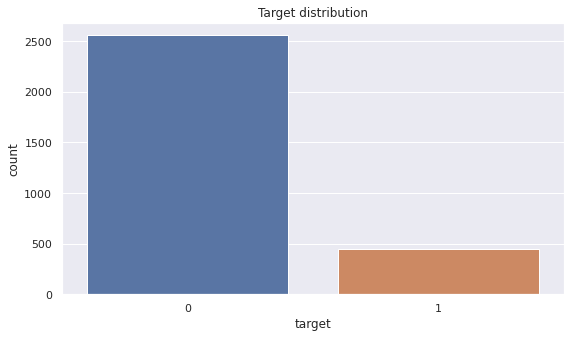

In [84]:
#let's visualise the distribution of churn
plt.figure(figsize=(9,5))
sns.countplot(df_train.target)
plt.title("Target distribution")
plt.show()

Our Target Data is unbalanced.

In [85]:
#lets count the benchmark for churn
df_train.target.value_counts(normalize=True).mul(100).rename("Target percentage")

0    85.166667
1    14.833333
Name: Target percentage, dtype: float64

##Logistic Regression Using Sklearn


Data Preprocessing Training data

In [86]:
df_train.head()

,variable_0,variable_1,variable_2,variable_3,variable_4,variable_5,variable_6,variable_7,variable_8,variable_9,variable_10,variable_11,variable_12,variable_13,variable_14,variable_15,variable_16,variable_17,State,ID,target
0,120,2.51,6.60,0,0,9.3,16.69,186.7,4,15.87,98.2,0,146.7,85,99,96,408,2,GA,0,0
1,94,1.81,8.13,0,0,6.7,30.82,182.4,2,15.50,181.3,0,180.6,108,135,103,415,0,OH,1,0
2,82,3.00,4.93,0,0,11.1,24.46,194.9,2,16.57,143.9,0,109.6,105,61,94,510,1,DC,2,0
3,170,2.27,6.05,0,1,8.4,44.18,245.0,3,20.83,259.9,0,134.4,122,68,121,510,3,VA,3,0
4,93,3.38,3.20,19,0,12.5,23.26,179.5,3,15.26,136.8,1,71.1,105,113,95,510,2,CA,4,0


In [87]:
# Removing ID
df_train = df_train.drop(columns='ID')

In [88]:
#drop state
df_train = df_train.drop(columns='State')

Correlation Matrix

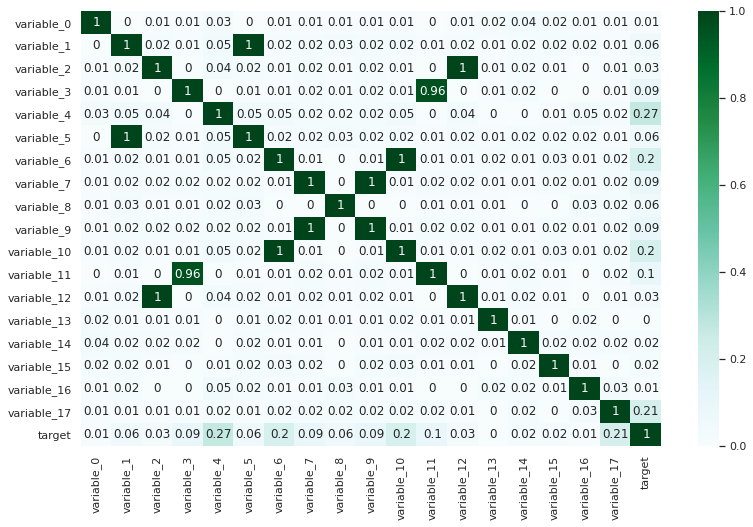

In [89]:
#Let's visualize correlations
plt.figure(figsize=(13,8))
sns.heatmap(df_train.corr().abs().round(2),annot=True, cmap = "BuGn")
plt.show()

We see several strongly correlated Variables marked as 1, such as "variable 12" and "variable _2". However, the rest of the variables are not correlated.

In [90]:
# How many columns do we now have?
len(df_train.columns)

19

Preparing Test Data

In [91]:
# Removing ID
df_test = df_test.drop(columns='ID')

In [92]:
df_test = df_test.drop(columns='State')

In [93]:
df_test.head()

,variable_0,variable_1,variable_2,variable_3,variable_4,variable_5,variable_6,variable_7,variable_8,variable_9,variable_10,variable_11,variable_12,variable_13,variable_14,variable_15,variable_16,variable_17
0,54,2.62,5.21,0,0,9.7,27.17,264.0,7,22.44,159.8,0,115.7,64,99,70,408,2
1,116,3.35,5.86,0,0,12.4,23.36,120.0,2,10.20,137.4,0,130.3,94,126,64,510,3
2,92,3.32,10.78,0,0,12.3,31.40,262.0,6,22.27,184.7,0,239.5,73,60,120,415,2
3,66,3.24,5.95,32,0,12.0,31.93,129.8,3,11.03,187.8,1,132.3,90,117,113,408,2
4,136,2.65,10.08,0,0,9.8,34.77,208.8,2,17.75,204.5,0,224.0,95,63,119,510,0


In [94]:
len(df_test.columns)

18

In [95]:
# We remove the label values from our training data
unscaled_Inputs = df_train.drop(['target'],axis=1)

# We assigned those label values to our Y dataset
target = df_train['target']

Standardization

In [96]:
from sklearn.preprocessing import StandardScaler

campaign_scaler = StandardScaler()
campaign_scaler.fit(unscaled_Inputs)
scaled_inputes = campaign_scaler.transform(unscaled_Inputs)
scaled_inputes

array([[ 0.4672919 , -0.34473887, -1.07160034, ..., -0.19640551,
        -0.68890061,  0.33271464],
       [-0.1814243 , -1.27783455, -0.39960098, ...,  0.15943227,
        -0.523657  , -1.1830696 ],
       [-0.48083177,  0.30842811, -1.80508984, ..., -0.29807344,
         1.71893485, -0.42517748],
       ...,
       [-0.63053551, -0.09147004, -0.69387521, ...,  0.41360211,
         1.71893485, -0.42517748],
       [-2.30222724,  1.09489448, -0.1931698 , ...,  0.1085983 ,
        -0.68890061, -0.42517748],
       [ 0.1429338 ,  0.94826515,  0.79506455, ...,  1.17611163,
        -0.523657  ,  1.09060676]])

####Let's Train a Logistic Regression Model

Training the model

In [97]:
model = LogisticRegression()
model.fit(scaled_inputes, target)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Finding the intercept and coefficients

In [98]:
#let's see the order of classes
model.classes_

array([0, 1])

In [99]:
model.intercept_

array([-2.25955064])

In [100]:
model.coef_

array([[ 1.79096726e-02,  1.18918334e-01,  8.23238155e-02,
         3.50758758e-01,  6.20288837e-01,  1.12058675e-01,
         3.30458077e-01,  1.72856456e-01, -2.33649815e-01,
         1.72813593e-01,  3.30045820e-01, -7.34263600e-01,
         8.17548955e-02,  6.89329799e-04,  7.32391552e-02,
         3.41770425e-02, -2.15474724e-02,  6.76405352e-01]])

In [101]:
predictions = model.predict(scaled_inputes)

print("Accuracy {0:.2f}%".format(100*accuracy_score(predictions, target)))
print(confusion_matrix(target, predictions))
print(classification_report(target, predictions))

Accuracy 85.83%
[[2480   75]
 [ 350   95]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2555
           1       0.56      0.21      0.31       445

    accuracy                           0.86      3000
   macro avg       0.72      0.59      0.62      3000
weighted avg       0.83      0.86      0.83      3000



As we see, we are doing good at predicting 0s. However not good for 1s, this might be because of unbalanced data.

####Test data

In [ ]:
df_test.head()

,variable_0,variable_1,variable_2,variable_3,variable_4,variable_5,variable_6,variable_7,variable_8,variable_9,variable_10,variable_11,variable_12,variable_13,variable_14,variable_15,variable_16,variable_17
0,54,2.62,5.21,0,0,9.7,27.17,264.0,7,22.44,159.8,0,115.7,64,99,70,408,2
1,116,3.35,5.86,0,0,12.4,23.36,120.0,2,10.20,137.4,0,130.3,94,126,64,510,3
2,92,3.32,10.78,0,0,12.3,31.40,262.0,6,22.27,184.7,0,239.5,73,60,120,415,2
3,66,3.24,5.95,32,0,12.0,31.93,129.8,3,11.03,187.8,1,132.3,90,117,113,408,2
4,136,2.65,10.08,0,0,9.8,34.77,208.8,2,17.75,204.5,0,224.0,95,63,119,510,0


Standartize

In [102]:
from sklearn.preprocessing import StandardScaler

test_scaler = StandardScaler()
test_scaler.fit(df_test)
test_scaled_inputes = test_scaler.transform(df_test)
test_scaled_inputes

array([[-1.21153175, -0.13813516, -1.68934989, ..., -1.75231273,
        -0.68823728,  0.32919222],
       [ 0.45014928,  0.79384583, -1.40226969, ..., -2.0777562 ,
         1.71775978,  1.11219944],
       [-0.19308209,  0.75554524,  0.77070653, ...,  0.95971617,
        -0.52311983,  0.32919222],
       ...,
       [ 2.48704859,  0.44914054,  0.23187909, ...,  0.1461075 ,
        -0.52311983,  0.32919222],
       [-1.05072391,  1.72582682,  0.47920972, ...,  0.52579155,
         1.71775978,  0.32919222],
       [-0.43429385,  0.75554524, -1.11960612, ...,  0.52579155,
         1.71775978, -0.453815  ]])

In [103]:
#getting probabilities using predict_proba
test_predict = model.predict(test_scaled_inputes)

In [104]:
#to have probabilities we will use predict_proba, which return probabilities of both being 1 and being 0. We are interested
#in probabilities of an observation being 1(responded the promotional offer)
test_proba_ignore = model.predict_proba(test_scaled_inputes)[:,0]
test_proba_respond = model.predict_proba(test_scaled_inputes)[:,1]

In [105]:
#creating new variables with prediction and probabilities and adding them to our test dataset
df_test['test_predict'] = test_predict

In [106]:
df_test['proba_ignore'] = test_proba_ignore

In [107]:
df_test['proba_respond'] = test_proba_respond

In [113]:
df_test.head()

,variable_0,variable_1,variable_2,variable_3,variable_4,variable_5,variable_6,variable_7,variable_8,variable_9,variable_10,variable_11,variable_12,variable_13,variable_14,variable_15,variable_16,variable_17,test_predict,proba_ignore,proba_respond
0,54,2.62,5.21,0,0,9.7,27.17,264.0,7,22.44,159.8,0,115.7,64,99,70,408,2,0,0.913205,0.086795
1,116,3.35,5.86,0,0,12.4,23.36,120.0,2,10.20,137.4,0,130.3,94,126,64,510,3,0,0.909382,0.090618
2,92,3.32,10.78,0,0,12.3,31.40,262.0,6,22.27,184.7,0,239.5,73,60,120,415,2,0,0.801452,0.198548
3,66,3.24,5.95,32,0,12.0,31.93,129.8,3,11.03,187.8,1,132.3,90,117,113,408,2,0,0.953691,0.046309
4,136,2.65,10.08,0,0,9.8,34.77,208.8,2,17.75,204.5,0,224.0,95,63,119,510,0,0,0.922735,0.077265


In [114]:
#likelihood of top 100 responding to an offer
df_test.sort_values(by=['proba_respond'], ascending=False).head(100)

,variable_0,variable_1,variable_2,variable_3,variable_4,variable_5,variable_6,variable_7,variable_8,variable_9,variable_10,variable_11,variable_12,variable_13,variable_14,variable_15,variable_16,variable_17,test_predict,proba_ignore,proba_respond
259,179,2.73,10.68,38,1,10.1,37.42,234.3,4,19.92,220.1,1,237.3,71,78,85,415,4,1,0.145174,0.854826
159,80,3.75,12.11,0,1,13.9,32.15,223.2,3,18.97,189.1,0,269.0,92,122,116,415,2,1,0.168696,0.831304
292,62,3.11,8.12,0,0,11.5,54.59,265.5,2,22.57,321.1,0,180.5,122,105,72,408,4,1,0.183190,0.816810
268,49,4.21,7.55,0,1,15.6,40.43,208.9,6,17.76,237.8,0,167.8,119,92,86,415,2,1,0.195476,0.804524
211,103,3.27,13.90,0,1,12.1,43.50,140.9,2,11.98,255.9,0,308.9,92,128,130,510,1,1,0.202973,0.797027
316,161,3.48,11.47,0,1,12.9,33.01,249.4,1,21.20,194.2,0,254.9,105,106,129,510,1,1,0.208177,0.791823
120,78,2.57,6.86,0,1,9.5,40.26,265.3,2,22.55,236.8,0,152.4,101,141,77,415,1,1,0.215894,0.784106
76,94,2.57,12.70,23,1,9.5,33.51,214.5,5,18.23,197.1,1,282.2,136,125,103,510,4,1,0.254774,0.745226
15,136,2.65,11.24,0,0,9.8,27.78,249.3,4,21.19,163.4,0,249.7,119,83,90,415,7,1,0.272012,0.727988
25,54,3.02,7.21,0,1,11.2,40.17,152.8,8,12.99,236.3,0,160.3,130,91,98,510,3,1,0.281816,0.718184
